In [1]:
#import library yang dibutuhkan
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [2]:
#baca dataset dari file
datasetPath = "Documents\dataku.txt"
dataset = np.loadtxt(datasetPath,delimiter=" ")

In [3]:
#mendefinisikan parameter k-means klustering
k = 2 # Jumlah cluster yang diinginkan
iterationCounter = 0 #counter untuk iterasi
input = dataset #input data

In [4]:
#fungsi untuk inisialisi titik pusat klaster (random)
def initCentroid(dataIn,k):
    result = dataIn[np.random.choice(dataIn.shape[0],k, replace= False)]
    return result

In [22]:
#fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers,centroid,iteration,converged):
    n= listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0,1,n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-"+iteration)
    marker = itertools.cycle(('.','*','^','x','+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:,0]),np.ravel(memberCluster[:,1]),
                   marker=marker.__next__(),s =100, c=col , label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid[i,0]), (centroid[i, 1]), marker =marker.__next__()
                   , c= col , label = "centroid-"+str(i +1))
    if(converged== 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged ==1):
        plt.legend()
        plt.show(block=True)

In [23]:
#fungsi utama algoritma k-means 
def kMeans (data, centroidInit): 
    nCluster = k #banyaknya klaster 
    global iterationCounter 
    centroidInit = np.matrix(centroidInit) 
    # looping hingga konvergen 
    while(True):
        iterationCounter +=1 
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0)) 
        #ulangi proses untuk semua klaster
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0],axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            #hitung jarak Euclidean
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster =\
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix),axis =1)
        #tempatkan data ke klaster yang jarak Euclideannya paling dekat
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster),axis=1))
        listClusterMember =[[] for i in range(k)]
        for i in range(0,data.shape[0]): #assign data to c luster regarding cluster matrix
            listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        #hitung titik pusat klaster terbaru
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis = 0)
            newCentroid = np.concatenate((newCentroid, centroidCluster),axis =0)
        print("iter: ", iterationCounter)
        print("centroid: ",newCentroid)
        #break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):
            break
        # update titik pusat klaster dengan nilai yang baru
        centroidInit = newCentroid
        #plot hasil klaster per iterasi
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter),0)
        time.sleep(1) # diberi jeda 1 detik agar hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit
        
            
            

C:\Users\HERLAM~1\AppData\Local\Temp/ipykernel_9240/2139094539.py:22: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its l

iter:  6
centroid:  [[-6.62872207 -2.59094207]
 [ 3.20236235  1.58500706]]


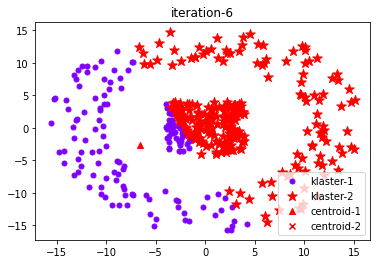

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  7
centroid:  [[-6.19395432 -2.2078216 ]
 [ 3.60864832  1.62250966]]


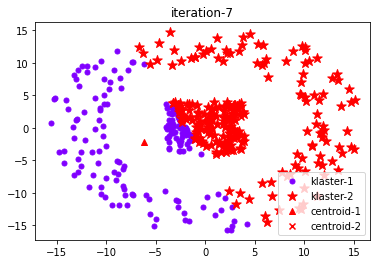

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  8
centroid:  [[-5.7507929  -1.75028415]
 [ 4.18356129  1.60733733]]


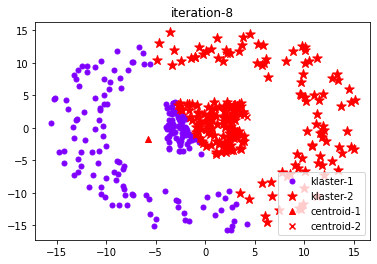

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  9
centroid:  [[-5.50624467 -1.39432589]
 [ 4.63136897  1.4934601 ]]


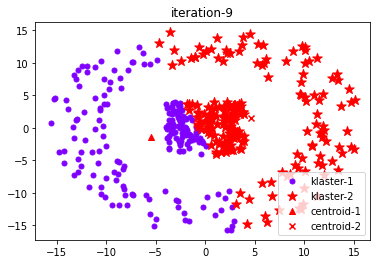

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  10
centroid:  [[-5.37989854 -1.12766878]
 [ 4.91444564  1.33160154]]


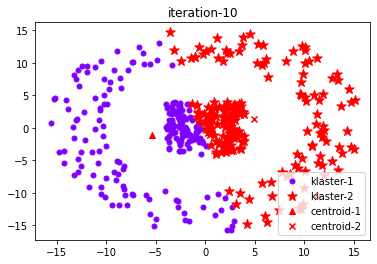

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  11
centroid:  [[-5.3219177  -0.95142488]
 [ 5.06658901  1.19025131]]


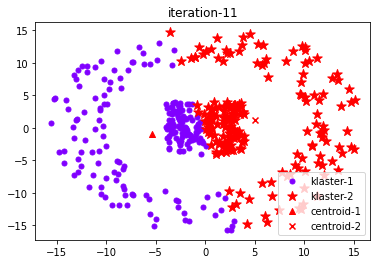

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  12
centroid:  [[-5.31701991 -0.74521327]
 [ 5.17105238  0.98269947]]


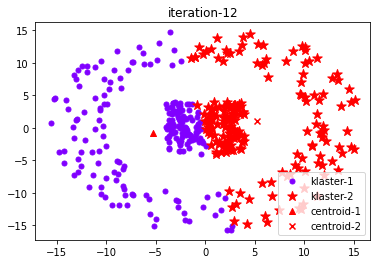

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  13
centroid:  [[-5.40625407 -0.53759426]
 [ 5.1588733   0.73742094]]


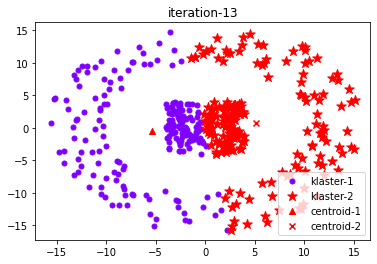

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  14
centroid:  [[-5.50949417 -0.35913398]
 [ 5.10512113  0.52820515]]


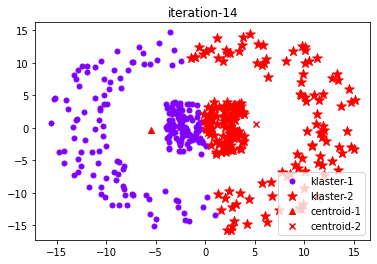

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  15
centroid:  [[-5.54854732 -0.22940976]
 [ 5.09174308  0.38727795]]


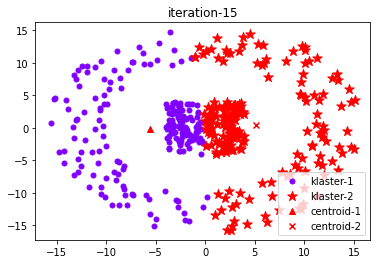

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  16
centroid:  [[-5.50459372 -0.12275121]
 [ 5.15486321  0.27927306]]


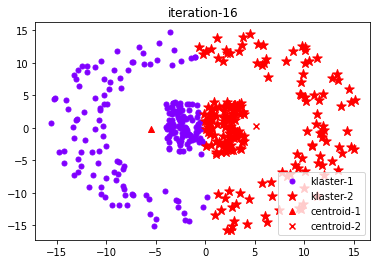

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  17
centroid:  [[-5.48137404 -0.0621601 ]
 [ 5.18522656  0.21572656]]


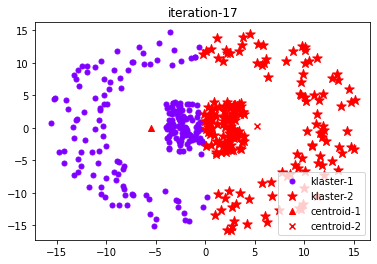

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  18
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


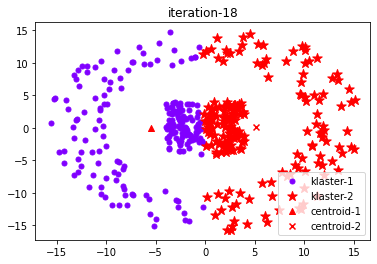

iter:  19
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


NameError: name 'clusterResults' is not defined

In [24]:
#panggil fungsi inisialisasi klater
centroidInit = initCentroid(input, k)
#panggil fungsi k-means
clusterResult, centroid = kMeans(input, centroidInit)
#plot hasil final klaseter setelah konvergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + "(converged)",1)